## Katupiri Restaurant Review Analysis

### Read the file

In [1]:
import pandas as pd
import numpy as np
import spacy as sp


In [5]:
# hide the warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_excel('Data/katupiri_reviews_full_data_27_05_2024_CLEANED.xlsx')
df.head()

,customer,review_date_formatted,meal_type,price_range,review_comment,rating,review_quality,rating_feedback,rating_food
0,Isabel Acosta,2024-04-27,Dine in,€10–20,"Healthy and gourmet pizzas, as their awards gu...",5,Food,Atmosphere,"Diavola, Calabresa 1 2 Katupiri, Pizza de Katu..."
1,Víctor manuel León cabanach,2024-04-27,Dine in,€10–20,Relaxing atmosphere terrace with TOP 100% home...,5,Food,Atmosphere,NaN
2,Przemysław Rupiński,2024-01-27,Dine in,€10–20,I had the pleasure of discovering Katupiri piz...,5,Food,Atmosphere,: 5/5
3,Gema Hernanz,2024-04-27,NaN,NaN,I arrive at 9:35 p.m. I tell him that we want ...,1,Service,NaN,NaN
4,Andrés JI,2024-04-27,Dine in,€10–20,Exquisite!! Eat homemade pizza and other delic...,5,Food,Atmosphere,"Pizza de Catupiry Y Portuguesa, Timbal de Bere..."


In [7]:
df.shape

(194, 9)

In [8]:
# check for missing values

df.isnull().sum()

customer                  0
review_date_formatted     0
meal_type                90
price_range              97
review_comment           32
rating                    0
review_quality           51
rating_feedback          56
rating_food              62
dtype: int64

### Manage the missing values 

In [9]:
# replace the missing values under meal type column with the mode value

df['meal_type'].fillna(df['meal_type'].mode()[0], inplace=True)



In [10]:
# replace the missing values under price_range column with the mode value

df['price_range'].fillna(df['price_range'].mode()[0], inplace=True)

In [11]:
# replace the missing values under review_comment column with the string 'not available'

df['review_comment'].fillna('not available', inplace=True)

In [12]:
# replace the missing values under review_quality column with the mode value

df['review_quality'].fillna(df['review_quality'].mode()[0], inplace=True)

In [13]:
# replace the missing values under rating_feedback column with the mode value

df['rating_feedback'].fillna(df['rating_feedback'].mode()[0], inplace=True)


In [14]:
# replace the missing values under rating_food column with the string 'not available'

df['rating_food'].fillna('not available', inplace=True)

### Check the data types of the columns and convert the data types if needed

In [15]:
# check the datatypes

df.dtypes

customer                         object
review_date_formatted    datetime64[ns]
meal_type                        object
price_range                      object
review_comment                   object
rating                            int64
review_quality                   object
rating_feedback                  object
rating_food                      object
dtype: object

### Data Cleaning and Preprocessing for the column 'review_comment'

In [16]:
df['review_comment'].head(10)

0    Healthy and gourmet pizzas, as their awards gu...
1    Relaxing atmosphere terrace with TOP 100% home...
2    I had the pleasure of discovering Katupiri piz...
3    I arrive at 9:35 p.m. I tell him that we want ...
4    Exquisite!! Eat homemade pizza and other delic...
5    This was by far the best pizza I have ever eat...
6    Great service! Super comfortable restaurant wi...
7    Excellent treatment and very pleasant atmosphe...
8    Brazilian corner in Madrid, with typical Brazi...
9    Amazing Brazilian family restaurant. Good qual...
Name: review_comment, dtype: object

In [17]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 320.0 kB/s eta 0:00:40
     ---------------------------------------- 0.1/12.8 MB 1.4 MB/s eta 0:00:09
     - -------------------------------------- 0.5/12.8 MB 3.1 MB/s eta 0:00:04
     -- ------------------------------------- 0.8/12.8 MB 4.4 MB/s eta 0:00:03
     --- ------------------------------------ 1.3/12.8 MB 5.4 MB/s eta 0:00:03
     ----- ---------------------------------- 1.7/12.8 MB 5.9 MB/s eta 0:00:02
     ------ --------------------------------- 2.1/12.8 MB 6.5 MB/s eta 0:00:02
     -------- ------------------------------- 2.6/12.8 MB 6.9 MB/s eta 0:00:02
     --------- ------------------------------ 3.0/12.8 MB 7.1 MB/s eta 0:00:02
     ---------- ----------------------------- 3.4/12.8 MB 7.3 MB/s eta 0:00:02
     ------------ --------------------------- 3.9/12.8 MB 7.5 MB/s eta 0:00:02
     ------------- -------------------------- 4.3/12.8 MB 

In [18]:
# load the spacy model

nlp = sp.load('en_core_web_sm')

In [19]:
# create a function to remove the stopwords, special characters and make the text lowercase

def clean_text(text):
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

In [20]:
# apply the function to the review_comment column

df['review_comment_cleaned'] = df['review_comment'].apply(clean_text)

In [21]:
# lemmatize the text function

def lemmatize_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    return ' '.join(tokens)

In [22]:
# apply the function to the review_comment_cleaned column

df['review_comment_lemmatized'] = df['review_comment_cleaned'].apply(lemmatize_text)

In [23]:
df['review_comment_lemmatized'][0]

'healthy gourmet pizza award guarantee take twist introduce brazilian dish yesterday eat wonderful muqueca cook care joao team delicious sea bass addition great value money polite close treatment repeat thank joao co.'

In [24]:
# tokenize the text function in words and sentences

def tokenize_text_words(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return tokens

In [25]:
# apply the function to the review_comment_lemmatized column

df['review_comment_tokenized_words'] = df['review_comment_lemmatized'].apply(tokenize_text_words)

In [26]:
print(df['review_comment_tokenized_words'][1])
print(df['review_comment_lemmatized'][1])

['relax', 'atmosphere', 'terrace', '100', 'homemade', 'pizzas!!!we', 'lucky', 'try', 'carnivorous', 'pizza', 'time', '😋', '100', 'recommend', 'repeat']
relax atmosphere terrace 100 homemade pizzas!!!we lucky try carnivorous pizza time 😋 100 recommend repeat


In [27]:
# remove the emojis from the text function
import re
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [28]:
# apply the function to the review_comment_lemmatized, review_comment_cleaned columns and review_comment_tokenized_words

df['review_comment_lemmatized'] = df['review_comment_lemmatized'].apply(remove_emojis)
df['review_comment_cleaned'] = df['review_comment_cleaned'].apply(remove_emojis)
#df['review_comment_tokenized_words'] = df['review_comment_tokenized_words'].apply(remove_emojis)

In [29]:
# create a function to bi-gram the text

def bigram_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    bigrams = [f'{tokens[i]}_{tokens[i+1]}' for i in range(len(tokens)-1)]
    return bigrams

In [30]:
# apply the function to the review_comment_lemmatized column

df['review_comment_lemmatized_bigram'] = df['review_comment_lemmatized'].apply(bigram_text)

df['review_comment_lemmatized_bigram'].head()

0    [healthy_gourmet, gourmet_pizza, pizza_award, ...
1    [relax_atmosphere, atmosphere_terrace, terrace...
2    [pleasure_discover, discover_katupiri, katupir...
3    [arrive_9:35, 9:35_p.m., p.m._tell, tell_want,...
4    [exquisite_eat, eat_homemade, homemade_pizza, ...
Name: review_comment_lemmatized_bigram, dtype: object

In [31]:
df['review_comment_lemmatized_bigram'][0]

['healthy_gourmet',
 'gourmet_pizza',
 'pizza_award',
 'award_guarantee',
 'guarantee_take',
 'take_twist',
 'twist_introduce',
 'introduce_brazilian',
 'brazilian_dish',
 'dish_yesterday',
 'yesterday_eat',
 'eat_wonderful',
 'wonderful_muqueca',
 'muqueca_cook',
 'cook_care',
 'care_joao',
 'joao_team',
 'team_delicious',
 'delicious_sea',
 'sea_bass',
 'bass_addition',
 'addition_great',
 'great_value',
 'value_money',
 'money_polite',
 'polite_close',
 'close_treatment',
 'treatment_repeat',
 'repeat_thank',
 'thank_joao',
 'joao_co.']

### Sentiment Analysis

In [32]:
# import vader sentiment intensity analyzer

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [33]:
df['review_comment_lemmatized'][3]

'arrive 9:35 p.m. tell want table show table 15 minute wait come drink people arrive 15 minute wait ask drink tell menu 10:10 p.m. tell pizza leave starter acceptable infinite pizza restaurant pizzeria 80 menu pizza sit thing convey customer lack professionalism empathy option able close kitchen restaurant area doubt return especially waitress serve terrace know leave people dinner thing worried entertain send video cell phone case happen papa john meter away'

In [34]:
# Test the analyzer Vader Sentiment library

# Initialize VaderSentiment analyzer
analyzer = SentimentIntensityAnalyzer()



def get_sentiment(text):
    # Preprocess text with spaCy
    doc = nlp(text)
    processed_text = ' '.join([token.text for token in doc])
    
    # Perform sentiment analysis with VaderSentiment
    sentiment = analyzer.polarity_scores(processed_text)
    
    return sentiment

# Example usage
text = "I really didn't like the food. It was terrible."
sentiment = get_sentiment(text)
print(sentiment)

{'neg': 0.354, 'neu': 0.646, 'pos': 0.0, 'compound': -0.6677}


In [35]:
# Test the analyzer TextBlob Sentiment library

from textblob import TextBlob

def get_sentiment_textblob(text):
    # Preprocess text with spaCy
    doc = nlp(text)
    processed_text = ' '.join([token.text for token in doc])
    
    # Perform sentiment analysis with TextBlob
    sentiment = TextBlob(processed_text).sentiment
    
    return sentiment

# Example usage

text = 'i hate the food so much'
sentiment = get_sentiment_textblob(text)
print(sentiment)

Sentiment(polarity=-0.30000000000000004, subjectivity=0.55)


### Sentiment Analysis library chosen: VaderSentiment

In [36]:
# apply the get_sentiment function to the review_comment_lemmatized column

df['sentiment_review_lemmatized'] = df['review_comment_lemmatized'].apply(get_sentiment)

In [37]:
# apply the get_sentiment function to the review_comment_lemmatized column showing the compound score only

df['sentiment_review_lemmatized_score'] = df['sentiment_review_lemmatized'].apply(lambda x: x['compound'])

### Analyze syntax using spacy

In [38]:
# analyze the syntax of the text

def analyze_syntax(text):
    doc = nlp(text)
    syntax = [(token.text, token.dep_, token.head.text) for token in doc]
    return syntax

# Example usage
text = "The food was delicious."
syntax = analyze_syntax(text)
print(syntax)

[('The', 'det', 'food'), ('food', 'nsubj', 'was'), ('was', 'ROOT', 'was'), ('delicious', 'acomp', 'was'), ('.', 'punct', 'was')]


In [39]:
# function to find similarities between two texts using spaCy

def find_similarity(text1, text2):
    doc1 = nlp(text1)
    doc2 = nlp(text2)
    similarity = doc1.similarity(doc2)
    return similarity

# Example usage
text1 = "The cat was on the table."
text2 = "The food was tasty."
similarity = find_similarity(text1, text2)
print(similarity)


0.7554533495980211


In [40]:
tokens = nlp("The food was tasty.")

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)


The True 9.844561 True
food True 7.054545 True
was True 8.052783 True
tasty True 8.179199 True
. True 11.409479 True


In [41]:
# Install the medium model

!python -m spacy download en_core_web_md

     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/42.8 MB 2.1 MB/s eta 0:00:20
     ---------------------------------------- 0.5/42.8 MB 4.2 MB/s eta 0:00:11
      --------------------------------------- 0.9/42.8 MB 5.6 MB/s eta 0:00:08
     - -------------------------------------- 1.3/42.8 MB 6.3 MB/s eta 0:00:07
     - -------------------------------------- 1.7/42.8 MB 6.9 MB/s eta 0:00:06
     -- ------------------------------------- 2.1/42.8 MB 7.2 MB/s eta 0:00:06
     -- ------------------------------------- 2.2/42.8 MB 7.4 MB/s eta 0:00:06
     -- ------------------------------------- 2.6/42.8 MB 6.6 MB/s eta 0:00:07
     -- ------------------------------------- 3.0/42.8 MB 6.9 MB/s eta 0:00:06
     --- ------------------------------------ 3.5/42.8 MB 7.2 MB/s eta 0:00:06
     --- ------------------------------------ 3.9/42.8 MB 7.3 MB/s

In [42]:
# Load the medium model and analyze the similarity of two documents

nlp_md = sp.load("en_core_web_md")  # make sure to use larger package!
doc1 = nlp_md("I like my dog when he comes to me.")
doc2 = nlp_md("Fast food tastes very good.")

# Similarity of two documents
print(doc1, "<->", doc2, doc1.similarity(doc2))
# Similarity of tokens and spans
french_fries = doc1[2:4]
burgers = doc1[5]
print(french_fries, "<->", burgers, french_fries.similarity(burgers))


I like my dog when he comes to me. <-> Fast food tastes very good. 0.45261908939431267
my dog <-> he 0.2634298801422119


In [43]:
# function to find similarities between text in the review_comment_lemmatized column

def find_similarity(text1, text2):
    doc1 = nlp_md(text1)
    doc2 = nlp_md(text2)
    similarity = doc1.similarity(doc2)
    return similarity

# Example usage
text1 = "The cat was on the tables."
text2 = "The food was tasty."

similarity = find_similarity(text1, text2)
print(similarity)

0.7492812292419758


In [44]:
# identify significant keywords or phrases in positive and negative reviews.

# create a function to extract the keywords

def extract_keywords(text):
    doc = nlp(text)
    keywords = [token.text for token in doc if token.is_stop == False and token.is_punct == False and token.is_alpha == True]
    return keywords

# apply the function to the review_comment_lemmatized column

df['review_comment_lemmatized_keywords'] = df['review_comment_lemmatized'].apply(extract_keywords)

In [45]:
df['review_comment_lemmatized_keywords']

0      [healthy, gourmet, pizza, award, guarantee, tw...
1      [relax, atmosphere, terrace, homemade, lucky, ...
2      [pleasure, discover, katupiri, pizza, experien...
3      [arrive, tell, want, table, table, minute, wai...
4      [exquisite, eat, homemade, pizza, delicacy, ty...
                             ...                        
189                                          [available]
190                                          [available]
191                                          [available]
192                                          [available]
193                                          [available]
Name: review_comment_lemmatized_keywords, Length: 194, dtype: object

### Find similarities between the reviews

In [46]:
from spacy import displacy
from spacy.matcher import PhraseMatcher

In [47]:
texts = df['review_comment_lemmatized'].tolist()
phrases = ['good', 'bad', 'tasty', 'delicious', 'terrible', 'horrible', 'relax', 'atmosphere', 'terrace', 'homemade', 'lucky']


matcher = PhraseMatcher(nlp_md.vocab)
patterns = [nlp_md(text) for text in phrases]
matcher.add("PhraseMatcher", None, *patterns)

for text in texts:
    doc = nlp_md(text)
    matches = matcher(doc)
    for match_id, start, end in matches:
        matched_text = doc[start:end]
        print(matched_text.text)


delicious
relax
atmosphere
terrace
homemade
lucky
delicious
terrace
homemade
good
atmosphere
relax
delicious
atmosphere
good
tasty
good
homemade
good
tasty
delicious
atmosphere
good
delicious
good
delicious
good
tasty
tasty
good
good
good
delicious
homemade
good
atmosphere
good
good
good
terrace
good
good
good
terrace
delicious
good
tasty
good
terrace
delicious
terrace
good
good
good
good
good
good
good
delicious
good
delicious
good
good
terrace
good
delicious
atmosphere
delicious
good
good
good
delicious
delicious
good
good
good
delicious
good
good
atmosphere
tasty
delicious
good
atmosphere
good
good
delicious
good
atmosphere
good
good
good
good
terrace
good
good
terrace
good
good
atmosphere
good
good
good
atmosphere
atmosphere
good
delicious
good
atmosphere
delicious
atmosphere
delicious
good
homemade
good
atmosphere
good
delicious
good
good
atmosphere
delicious
terrace
good
terrace
good
good
good
bad
delicious
terrible
good
delicious
delicious
delicious
delicious
good
good
homemade


### Topic Modelling using LDA

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Extract the 'review_comment_lemmatized' column
text_data = df['review_comment_lemmatized'].dropna()

# Step 2: Create a Document-Term Matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(text_data)

# Step 3: Train the LDA Model
num_topics = 5  # Number of topics to extract
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(doc_term_matrix)

# Step 4: Extract and Display the Topics
def display_topics(model, feature_names, num_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        topics.append(" ".join(top_words))
    return topics

num_top_words = 5
feature_names = vectorizer.get_feature_names_out()
topics = display_topics(lda, feature_names, num_top_words)
topics

['good pizza super atmosphere eat',
 'pizza good try delicious tell',
 'good food pizza available service',
 'pizza place good option nice',
 'pizza good dough order service']

### 5 Top Topics

1. 'good pizza super atmosphere eat',
2. 'pizza good try delicious tell',
3. 'good food pizza available service',
4. 'pizza place good option nice',
5. 'pizza good dough order service'


In [81]:
# save the scikit learn topics to a dataframe

sk_data = [
 ('topic 1', 'good pizza super atmosphere eat'),
 ('topic 2','pizza good try delicious tell'),
 ('topic 3','good food pizza available service'),
 ('topic 4','pizza place good option nice'),
 ('topic 5','pizza good dough order service')
 ]



topics_df = pd.DataFrame(sk_data, columns=['topic_rank', 'topic_words'])

topics_df

,topic_rank,topic_words
0,topic 1,good pizza super atmosphere eat
1,topic 2,pizza good try delicious tell
2,topic 3,good food pizza available service
3,topic 4,pizza place good option nice
4,topic 5,pizza good dough order service


In [82]:
# save the topics to an excel file

topics_df.to_excel('Data/topics_sklearn.xlsx', index=False)

## Topic Modeling Using BERTopic

In [49]:
# import Bert Topic Library

from bertopic import BERTopic

In [50]:
# Initialize BERTopic embedding model 

topic_model = BERTopic(embedding_model='all-MiniLM-L6-v2')

In [56]:
# Fit the model on the review_review_comment column

topics, probs = topic_model.fit_transform(df['review_comment_lemmatized'])

In [60]:
# Extract the topics

topic_model.get_topics()

{0: [('pizza', 0.13198514551458657),
  ('good', 0.11562360045502083),
  ('food', 0.06610180068089586),
  ('delicious', 0.0641844884647478),
  ('service', 0.06321366250056482),
  ('recommend', 0.057205727725543574),
  ('place', 0.049748522337835506),
  ('excellent', 0.044070352944559986),
  ('friendly', 0.044070352944559986),
  ('atmosphere', 0.04049732522847113)],
 1: [('available', 3.6391797855616637),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05)]}

In [78]:
topic_model.get_topic(0)

[('pizza', 0.13198514551458657),
 ('good', 0.11562360045502083),
 ('food', 0.06610180068089586),
 ('delicious', 0.0641844884647478),
 ('service', 0.06321366250056482),
 ('recommend', 0.057205727725543574),
 ('place', 0.049748522337835506),
 ('excellent', 0.044070352944559986),
 ('friendly', 0.044070352944559986),
 ('atmosphere', 0.04049732522847113)]

In [79]:
# save the topic model into a pandas dataframe

data = [
 ('pizza', 0.14),
 ('good', 0.11),
 ('food', 0.06),
 ('delicious', 0.06),
 ('service', 0.06),
 ('recommend', 0.06),
 ('place', 0.05),
 ('excellent', 0.04),
 ('friendly', 0.04),
 ('atmosphere', 0.04)
]

df_bert_topic = pd.DataFrame(data, columns=['topic', 'probability'])

df_bert_topic.head()

,topic,probability
0,pizza,0.14
1,good,0.11
2,food,0.06
3,delicious,0.06
4,service,0.06


In [80]:
# save the dataframe into an excel file

df_bert_topic.to_excel('Data/bert_topic_model.xlsx', index=False)

In [83]:
#save the df to an excel file with the current date

df.to_excel('Data/katupiri_reviews_full_data_27_05_2024_ANALYZED_CLEANED.xlsx', index=False)

In [85]:
# count the keywords in the review_comment_lemmatized_keywords column

from collections import Counter

keywords = df['review_comment_lemmatized_keywords'].tolist()
keywords = [word for sublist in keywords for word in sublist]

word_freq = Counter(keywords)

word_freq.most_common(10)

# save the word_freq to a dataframe

word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])

word_freq_df.head(20)


,word,frequency
0,healthy,1
1,gourmet,1
2,pizza,140
3,award,2
4,guarantee,1
5,twist,1
6,introduce,1
7,brazilian,21
8,dish,7
9,yesterday,1


In [86]:
# save the word_freq_df to an excel file

word_freq_df.to_excel('Data/keywords_freq.xlsx', index=False)

In [101]:
# calculate the keywords frequency in the review_comment_bigram column

keywords_bigram = df['review_comment_lemmatized_bigram'].tolist()

keywords_bigram = [word for sublist in keywords_bigram for word in sublist]

word_freq_bigram = Counter(keywords_bigram)

word_freq_bigram.most_common(10)

# save the word_freq_bigram to a dataframe

word_freq_bigram_df = pd.DataFrame(word_freq_bigram.items(), columns=['word', 'frequency'])

word_freq_bigram_df.tail(50)

# find the most common bigrams in the review_comment_lemmatized_bigram column

bigrams = df['review_comment_lemmatized_bigram'].tolist()

bigrams = [word for sublist in bigrams for word in sublist]

bigram_freq = Counter(bigrams)

bigram_freq.most_common(30)



[('good_pizza', 21),
 ('highly_recommend', 13),
 ('pizza_good', 12),
 ('delicious_food', 9),
 ('delicious_pizza', 9),
 ('good_service', 8),
 ('good_food', 8),
 ('good_atmosphere', 8),
 ('super_friendly', 7),
 ('pizza_delicious', 7),
 ('vegetarian_option', 6),
 ('pizza_eat', 6),
 ('excellent_service', 6),
 ('friendly_service', 5),
 ('order_pizza', 5),
 ('nice_place', 5),
 ('food_good', 5),
 ('good_price', 5),
 ('value_money', 4),
 ('quality_pizza', 4),
 ('great_service', 4),
 ('excellent_treatment', 4),
 ('atmosphere_good', 4),
 ('place_small', 4),
 ('service_good', 4),
 ('recommend_100', 4),
 ('cancel_reservation', 4),
 ('menu_pizza', 3),
 ('homemade_pizza', 3),
 ('service_super', 3)]

In [102]:
bigrams_freq = [
('good_pizza', 21),
 ('highly_recommend', 13),
 ('pizza_good', 12),
 ('delicious_food', 9),
 ('delicious_pizza', 9),
 ('good_service', 8),
 ('good_food', 8),
 ('good_atmosphere', 8),
 ('super_friendly', 7),
 ('pizza_delicious', 7),
 ('vegetarian_option', 6),
 ('pizza_eat', 6),
 ('excellent_service', 6),
 ('friendly_service', 5),
 ('order_pizza', 5),
 ('nice_place', 5),
 ('food_good', 5),
 ('good_price', 5),
 ('value_money', 4),
 ('quality_pizza', 4),
 ('great_service', 4),
 ('excellent_treatment', 4),
 ('atmosphere_good', 4),
 ('place_small', 4),
 ('service_good', 4),
 ('recommend_100', 4),
 ('cancel_reservation', 4),
 ('menu_pizza', 3),
 ('homemade_pizza', 3),
 ('service_super', 3)
]

bigrams_freq_df = pd.DataFrame(bigrams_freq, columns=['bigram', 'frequency'])

bigrams_freq_df.head(20)

,bigram,frequency
0,good_pizza,21
1,highly_recommend,13
2,pizza_good,12
3,delicious_food,9
4,delicious_pizza,9
5,good_service,8
6,good_food,8
7,good_atmosphere,8
8,super_friendly,7
9,pizza_delicious,7


In [103]:
# save the bigrams_freq_df to an excel file

bigrams_freq_df.to_excel('Data/bigrams_freq.xlsx', index=False)

In [2]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

## Create word cloud for negative and positive bigrams

In [7]:
negative_bigrams = pd.read_csv('Dash_Board_PowerBI/negative_bi_grams.csv')
negative_bigrams.head()

,review_comment_lemmatized_bigram,Sentiment_Category
0,"'arrive_9:35', '9:35_p.m.', 'p.m._tell', 'tell...",Negative
1,"'disappoint_wait', 'wait_40', '40_minute', 'mi...",Negative
2,"'order_glovo', 'glovo_live', 'live_close', 'cl...",Negative
3,"'order_pizza', 'pizza_keep', 'keep_wait', 'wai...",Negative
4,"'star_reservation', 'reservation_fork', 'fork_...",Negative


In [10]:
# take out the commas and the brackets from the bigrams column

negative_bigrams['review_comment_lemmatized_bigram'] = negative_bigrams['review_comment_lemmatized_bigram'].str.replace('[', ' ')
negative_bigrams.head()

,review_comment_lemmatized_bigram,Sentiment_Category
0,"'arrive_9:35', '9:35_p.m.', 'p.m._tell', 'tell...",Negative
1,"'disappoint_wait', 'wait_40', '40_minute', 'mi...",Negative
2,"'order_glovo', 'glovo_live', 'live_close', 'cl...",Negative
3,"'order_pizza', 'pizza_keep', 'keep_wait', 'wai...",Negative
4,"'star_reservation', 'reservation_fork', 'fork_...",Negative


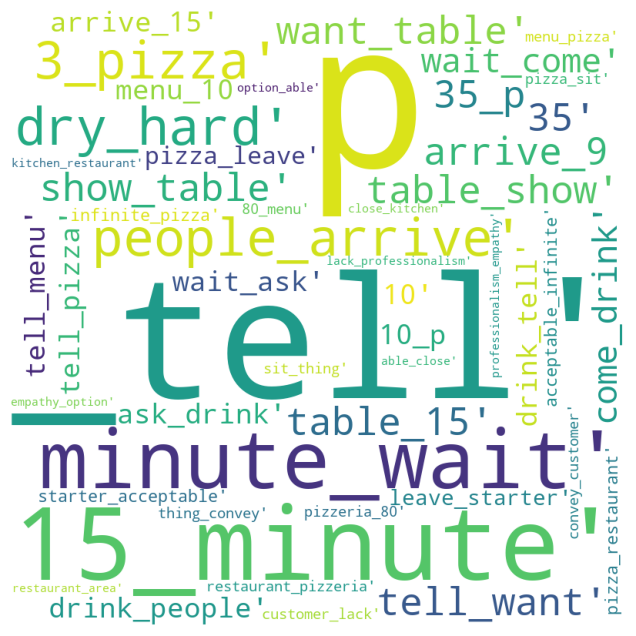

In [17]:
# instantiate the wordcloud object

wc = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'),
                max_words=50,
                min_font_size = 10).generate(' '.join(negative_bigrams['review_comment_lemmatized_bigram']))

# plot the wordcloud image

plt.figure(figsize = (8, 8), facecolor = None)
plt.axis("off")
plt.imshow(wc)

In [18]:
positive_bigrams = pd.read_csv('Dash_Board_PowerBI/Positive Bi-Grams.csv')
positive_bigrams.head()

,review_comment_lemmatized_bigram,Sentiment_Category
0,"'100_recommendable', 'recommendable_friendly',...",Positive
1,"'absolutely_wonderful', 'wonderful_pizza', 'pi...",Positive
2,"'amazing_atmosphere', 'atmosphere_delicious', ...",Positive
3,"'amazing_brazilian', 'brazilian_family', 'fami...",Positive
4,"'amazing_food', 'food_great', 'great_service',...",Positive


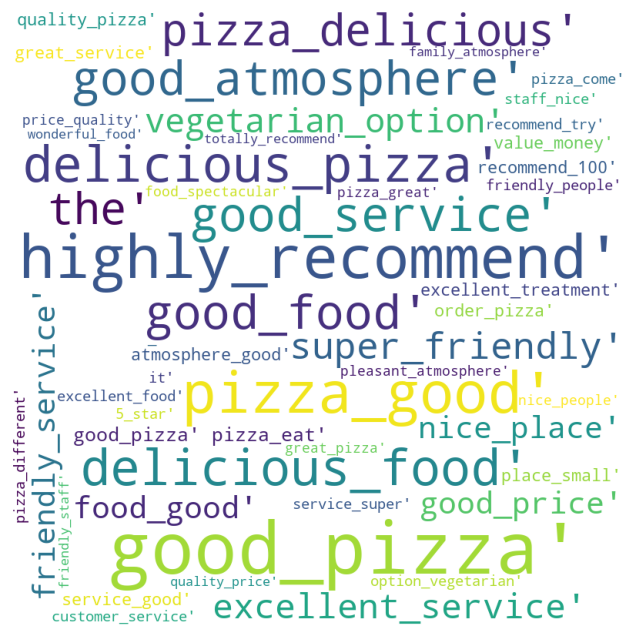

In [19]:
wc2 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'),
                max_words=50,
                min_font_size = 10).generate(' '.join(positive_bigrams['review_comment_lemmatized_bigram']))

# plot the wordcloud image

plt.figure(figsize = (8, 8), facecolor = None)
plt.axis("off")
plt.imshow(wc2)